In [15]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science D.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 11 ms, sys: 10.9 ms, total: 22 ms
Wall time: 22.5 ms


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,6/20/2023 11:20:19,nikomangsulastriasih@gmail.com,Achmad Rivaldi Fahrihusaeni,1,VIID,I Putu Agus Diva Pratama,baik,I Wayan Terry Aldi Putra,nyaman diajak ngobrol,I Putu Satya Wiraguna,suka mengejek,Desak Kadek Dwi Eliyani,suka cerewet gak jelas
1,5/16/2023 18:40:20,bawa.tara10@gmail.com,Anak Agung Istri Gayatri Taradewi,2,VIID,Ni Komang Sri Wahyuni,Karena dia baik dan bisa menjadi tempat yang b...,Ni Komang Sri Wahyuni,Baik,I Gusti Ngurah Wira Dharma,"Sering mengejek nama ortu, menjelekkan fisik sy",I Putu Satya Wiraguna,Sering mengejek nama ortu saat di tanya serius
2,6/20/2023 11:38:14,nikomangsulastriasih@gmail.com,Desak Kadek Dwi Eliyani,3,VIID,Dewa Ayu Tika Padma Ardina,karena dia baik,Ni Wayan Widiasanti,karena sering membuat saya tertawa,I Putu Satya Wiraguna,karena sering mengejek nama ortu saya,I Wayan Terry Aldi Putra,karena dia sering mengejek nama ortu saya
3,6/20/2023 11:08:28,nikomangsulastriasih@gmail.com,Desak Putu Lestari Dewi,4,VIID,Ni Luh Made Sri Gustina,karena teman dekat saya,Ni Komang Ary Kencana Putri,"dia ramah, pintar dan baik",I Putu Satya Wiraguna,"dia suka mengejek, menggangu dan gede rasa",I Wayan Armawan,dia suka mengejek dan mengganggu
4,5/17/2023 10:34:04,bawa.tara10@gmail.com,Dewa Ayu Ratna Vania,5,VIID,Anak Agung Istri Gayatri Taradewi,Iy karena dia baik,Anak Agung Istri Gayatri Taradewi,Iy karena di selalu kasih saya contekan,I Wayan Terry Aldi Putra,Karena dia sering membuat saya marah,I Putu Satya Wiraguna,Iy karena dia selalu ngejek mengejek nama oran...
5,5/17/2023 10:26:00,bawa.tara10@gmail.com,Dewa Ayu Tiwi Padma Adnyani,7,VIID,Anak Agung Istri Gayatri Taradewi,Iya karena dia sering memberi sy contekan,Ni Wayan Widiasanti,Karena dia bisa membuat sy ketawa,I Putu Satya Wiraguna,Karena dia membuat sy kesal,I Wayan Terry Aldi Putra,Karena dia sering membuat sy marah
6,5/6/2023 18:17:28,satriadwipayana3@gmail.com,Dewa Made Satria Dwipayana,8,VIID,Achmad Rivaldi Fahrihusaeni,Asik dan baik,Kadek Rido Halporikska,Baik,I Putu Satya Wiraguna,Baperan dan tidak boleh di ajak bercanda,I Gusti Ngurah Wira Dharma,SERING MENGEJEK NAMA ORANG TUA
7,5/21/2023 22:22:08,agusica420@gmail.com,Gusti Ngurah Agung Diatmika,9,VIID,I Komang Catur Gandhi Maprila Pratama,Karena baik,I Komang Catur Gandhi Maprila Pratama,Karena baik,Dewa Ayu Tika Padma Ardina,Berisik!!!,Dewa Ayu Tika Padma Ardina,Berisik!!
8,6/20/2023 11:17:57,nikomangsulastriasih@gmail.com,Gusti Ngurah Agung Diatmika,9,VIID,I Komang Catur Gandhi Maprila Pratama,karena baik,I Gusti Ngurah Wira Dharma,karena baik,Dewa Ayu Tiwi Padma Adnyani,berisik,Dewa Ayu Tika Padma Ardina,berisik
9,5/4/2023 18:09:40,weasepp06@gmail.com,I Gusti Ngurah Wira Dharma,10,VIID,Kadek Rido Halporikska,Asik,Gusti Ngurah Agung Diatmika,Baik,Dewa Ayu Tika Padma Ardina,Berisik,Desak Kadek Dwi Eliyani,Berisik


In [16]:
%%time
# Pemeriksaan data awal

print(df.head())

            Timestamp                   Email Address  \
0  6/20/2023 11:20:19  nikomangsulastriasih@gmail.com   
1  5/16/2023 18:40:20           bawa.tara10@gmail.com   
2  6/20/2023 11:38:14  nikomangsulastriasih@gmail.com   
3  6/20/2023 11:08:28  nikomangsulastriasih@gmail.com   
4  5/17/2023 10:34:04           bawa.tara10@gmail.com   

                        NAMA LENGKAP  NO ABSEN KELAS  \
0        Achmad Rivaldi Fahrihusaeni         1  VIID   
1  Anak Agung Istri Gayatri Taradewi         2  VIID   
2            Desak Kadek Dwi Eliyani         3  VIID   
3            Desak Putu Lestari Dewi         4  VIID   
4               Dewa Ayu Ratna Vania         5  VIID   

  1. Teman anda yang paling anda sukai di kelas  \
0                      I Putu Agus Diva Pratama   
1                         Ni Komang Sri Wahyuni   
2                    Dewa Ayu Tika Padma Ardina   
3                       Ni Luh Made Sri Gustina   
4             Anak Agung Istri Gayatri Taradewi   

             

In [17]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 4.84 ms, sys: 921 µs, total: 5.76 ms
Wall time: 6.05 ms


In [18]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 1.81 ms, sys: 125 µs, total: 1.93 ms
Wall time: 1.91 ms


In [19]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data D.csv', index=False)

CPU times: user 9.05 ms, sys: 10.1 ms, total: 19.1 ms
Wall time: 27.8 ms


In [20]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 365 µs, sys: 61 µs, total: 426 µs
Wall time: 389 µs


In [21]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 308 µs, sys: 81 µs, total: 389 µs
Wall time: 415 µs


In [22]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 16.2 ms, sys: 2.95 ms, total: 19.2 ms
Wall time: 17.9 ms


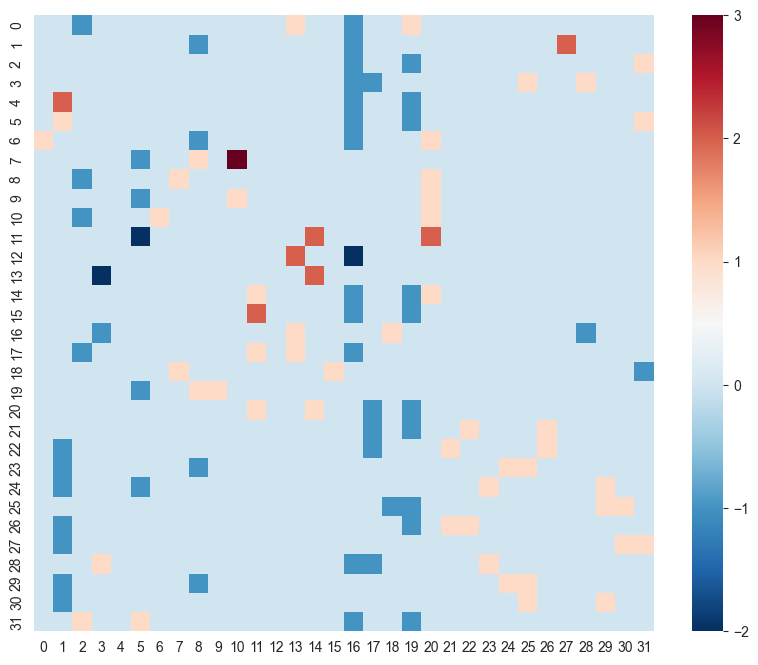

CPU times: user 3.53 s, sys: 178 ms, total: 3.7 s
Wall time: 6.12 s


In [23]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [24]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 4.08 ms, sys: 914 µs, total: 4.99 ms
Wall time: 4.43 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

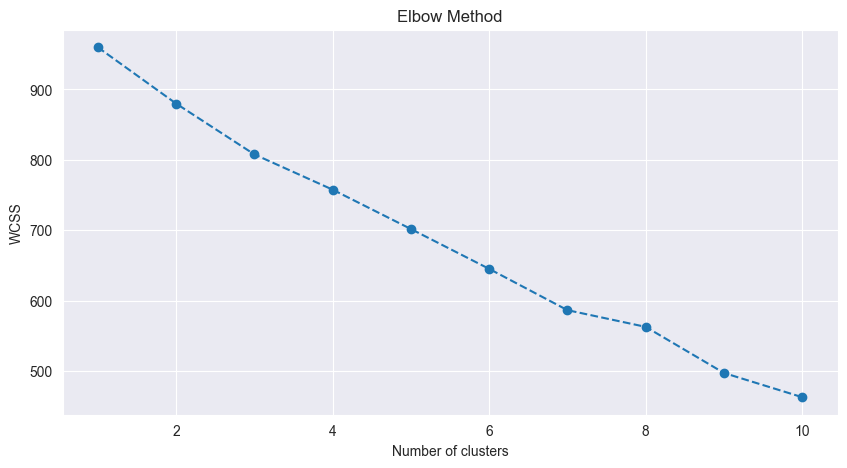

CPU times: user 2.16 s, sys: 178 ms, total: 2.33 s
Wall time: 1.7 s


In [25]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 77.7 ms, sys: 10.5 ms, total: 88.2 ms
Wall time: 37.8 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
%%time


print(len(df))
print(len(clustered_students))


34
32
CPU times: user 558 µs, sys: 189 µs, total: 747 µs
Wall time: 687 µs


In [28]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

            Timestamp                   Email Address  \
0  6/20/2023 11:20:19  nikomangsulastriasih@gmail.com   
1  5/16/2023 18:40:20           bawa.tara10@gmail.com   
2  6/20/2023 11:38:14  nikomangsulastriasih@gmail.com   
3  6/20/2023 11:08:28  nikomangsulastriasih@gmail.com   
4  5/17/2023 10:34:04           bawa.tara10@gmail.com   

                        NAMA LENGKAP  NO ABSEN KELAS  \
0        Achmad Rivaldi Fahrihusaeni         1  VIID   
1  Anak Agung Istri Gayatri Taradewi         2  VIID   
2            Desak Kadek Dwi Eliyani         3  VIID   
3            Desak Putu Lestari Dewi         4  VIID   
4               Dewa Ayu Ratna Vania         5  VIID   

  1. Teman anda yang paling anda sukai di kelas  \
0                      I Putu Agus Diva Pratama   
1                         Ni Komang Sri Wahyuni   
2                    Dewa Ayu Tika Padma Ardina   
3                       Ni Luh Made Sri Gustina   
4             Anak Agung Istri Gayatri Taradewi   

             

In [29]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



32
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [30]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 307 µs, sys: 70 µs, total: 377 µs
Wall time: 372 µs


In [31]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


            Timestamp                    Email Address  \
21  5/4/2023 17:57:17  nikadekarykencanadewi@gmail.com   
22  5/4/2023 18:00:14          dwiantari0806@gmail.com   
26   5/8/2023 8:54:08          ratnadewi3762@gmail.com   

                 NAMA LENGKAP  NO ABSEN KELAS  \
21  Ni Kadek Ary Kencana Dewi        23  VIID   
22         Ni Kadek Dwiantari        24  VIID   
26       Ni Komang Ratna Dewi        28  VIID   

   1. Teman anda yang paling anda sukai di kelas  \
21                          Ni Komang Ratna Dewi   
22                          Ni Komang Ratna Dewi   
26                            Ni Kadek Dwiantari   

                                               Alasan  \
21                                               Baik   
22                                                 29   
26  Krna dia baik dn dia jga sllu mengerti tentang...   

   2. Teman anda yang paling anda sukai di kelas  \
21                            Ni Kadek Dwiantari   
22                     Ni Ka

In [32]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 173 µs, sys: 744 µs, total: 917 µs
Wall time: 930 µs


In [33]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 11.1 ms, sys: 2.13 ms, total: 13.2 ms
Wall time: 11.9 ms


In [34]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 4.94 ms, sys: 5.93 ms, total: 10.9 ms
Wall time: 12.6 ms


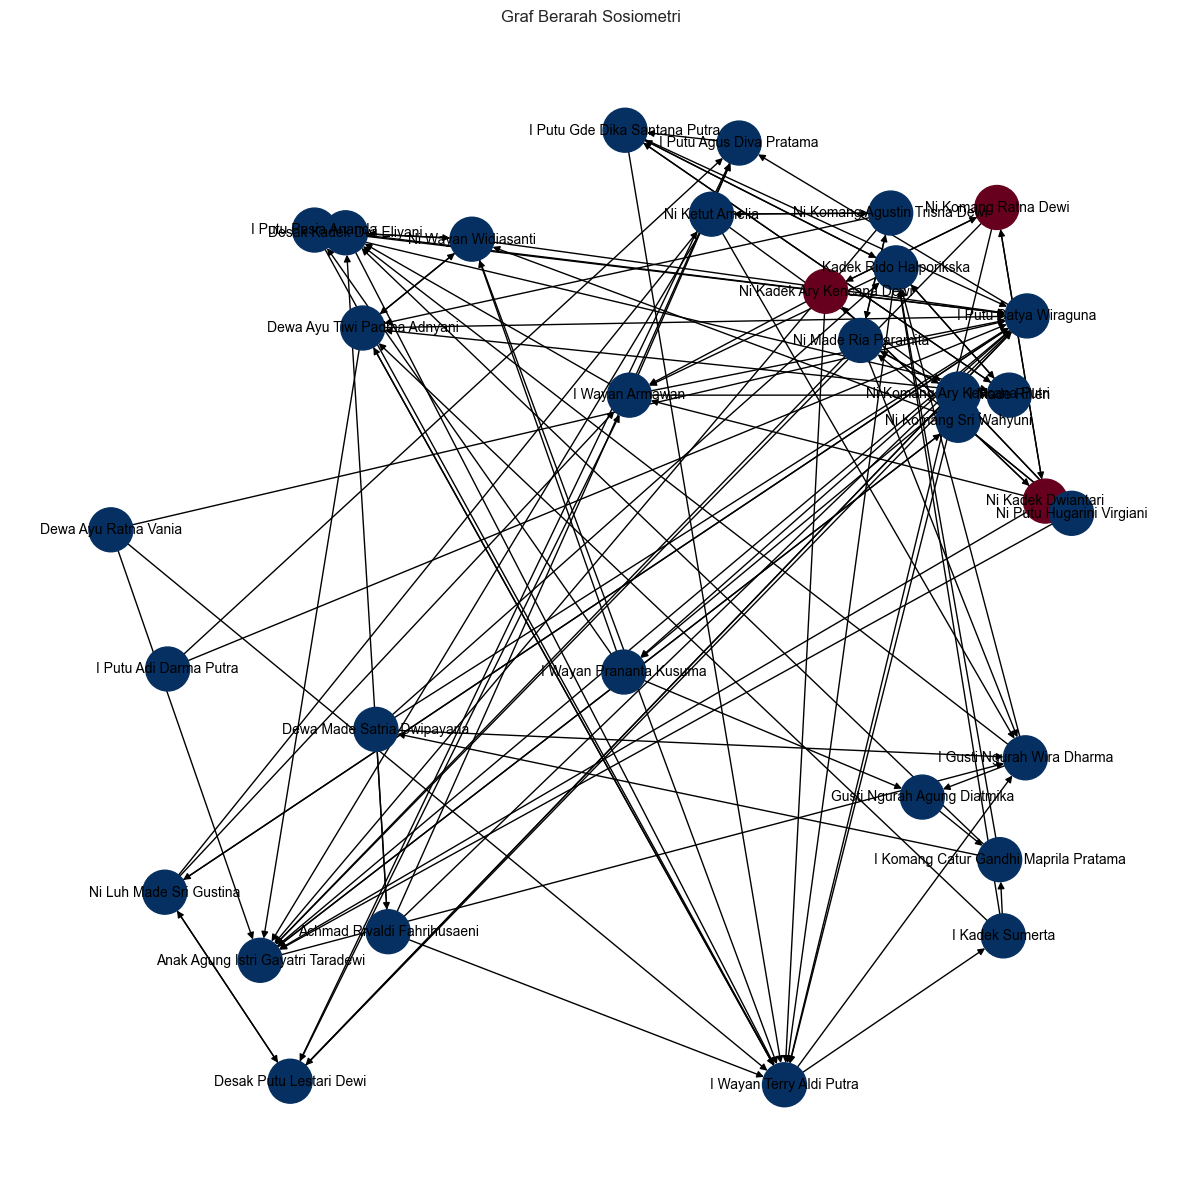

CPU times: user 1.6 s, sys: 151 ms, total: 1.75 s
Wall time: 1.5 s


In [46]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [47]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 273 µs, sys: 2 µs, total: 275 µs
Wall time: 285 µs


In [48]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 2.99 ms, sys: 127 µs, total: 3.12 ms
Wall time: 3.1 ms


In [49]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
            Timestamp              Email Address                 NAMA LENGKAP  \
20  5/4/2023 17:34:05      ridohpl2720@gmail.com       Kadek Rido Halporikska   
11  5/5/2023 20:15:06       maderillen@gmail.com                I Made Rillen   
25  5/4/2023 18:07:07  arykencanaputri@gmail.com  Ni Komang Ary Kencana Putri   
13  5/4/2023 18:01:26      agusdiva390@gmail.com     I Putu Agus Diva Pratama   
30  5/4/2023 18:00:53     hugariniputu@gmail.com    Ni Putu Hugarini Virgiani   

    NO ABSEN KELAS 1. Teman anda yang paling anda sukai di kelas  \
20        22  VIID                                 I Made Rillen   
11        13  VIID                        Kadek Rido Halporikska   
25        27  VIID                          Ni Made Ria Paramita   
13        15  VIID                 I Putu Gde Dika Santana Putra   
30        32  VIID                   Ni Komang Ary Kencana Putri   

                                               Alasan  \
20  Karena

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


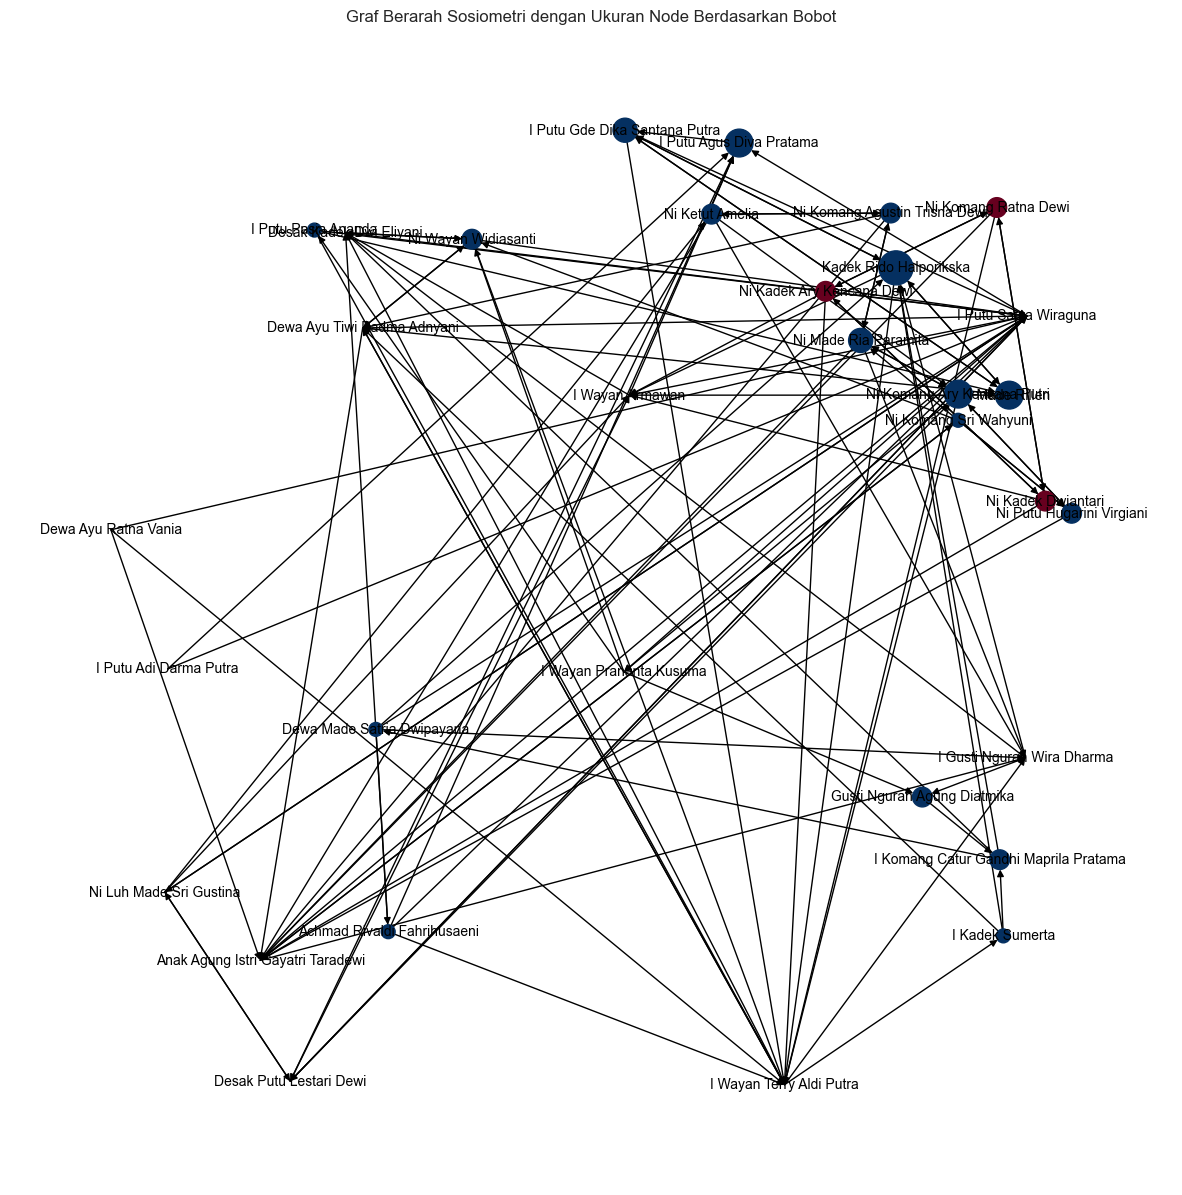

CPU times: user 2.25 s, sys: 203 ms, total: 2.46 s
Wall time: 2.43 s


In [50]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [51]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 33 µs, sys: 15 µs, total: 48 µs
Wall time: 58.9 µs


In [52]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 447 µs, sys: 4 µs, total: 451 µs
Wall time: 466 µs


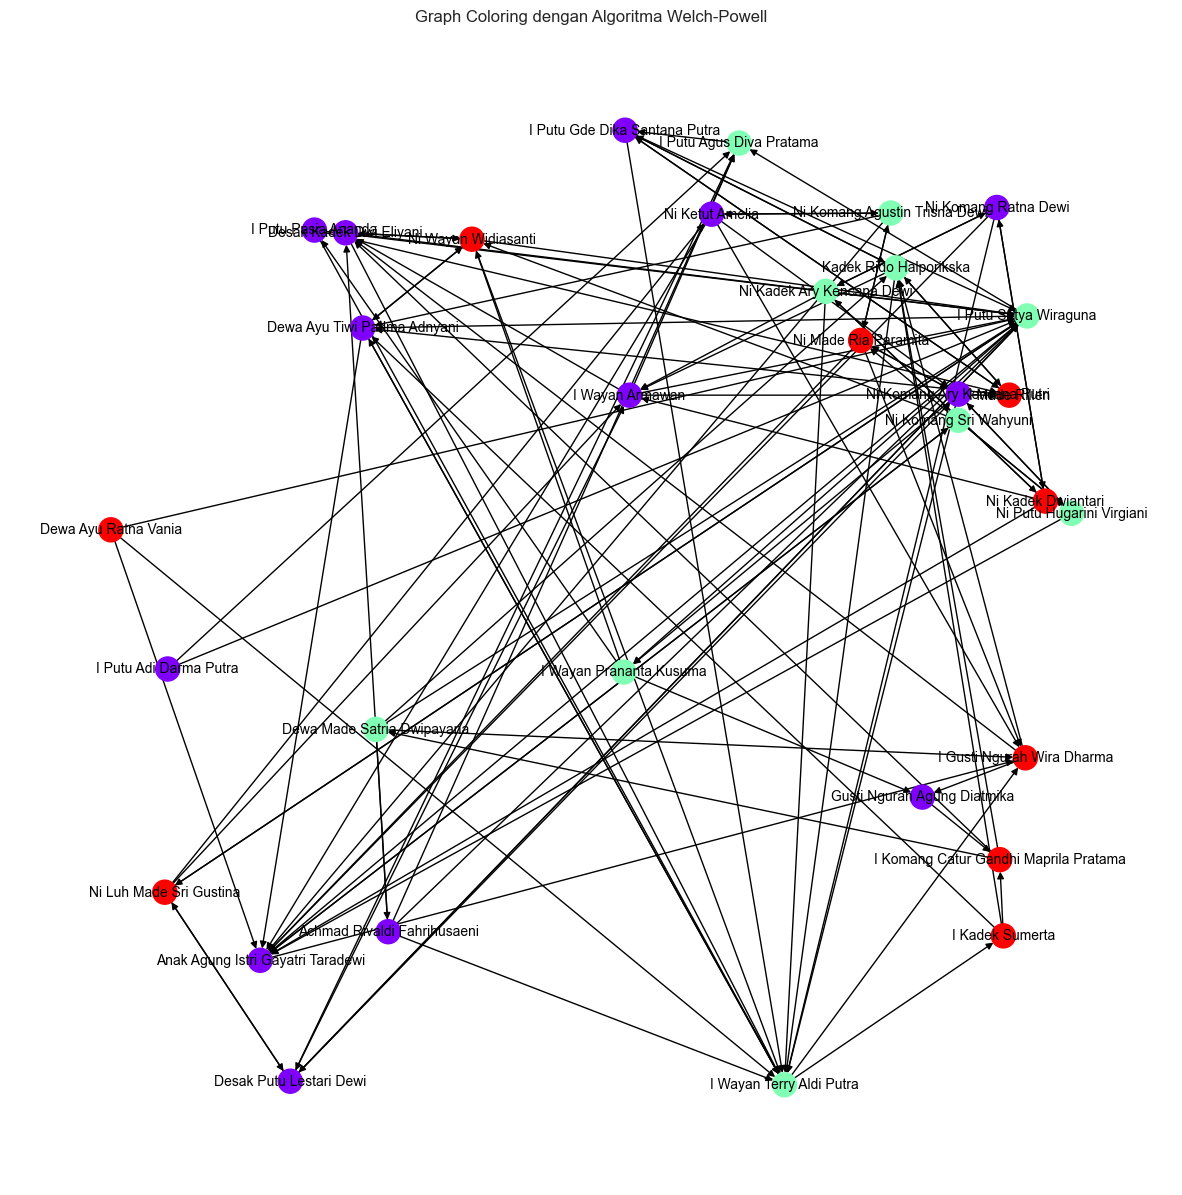

CPU times: user 4.57 s, sys: 375 ms, total: 4.95 s
Wall time: 5.55 s


In [53]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


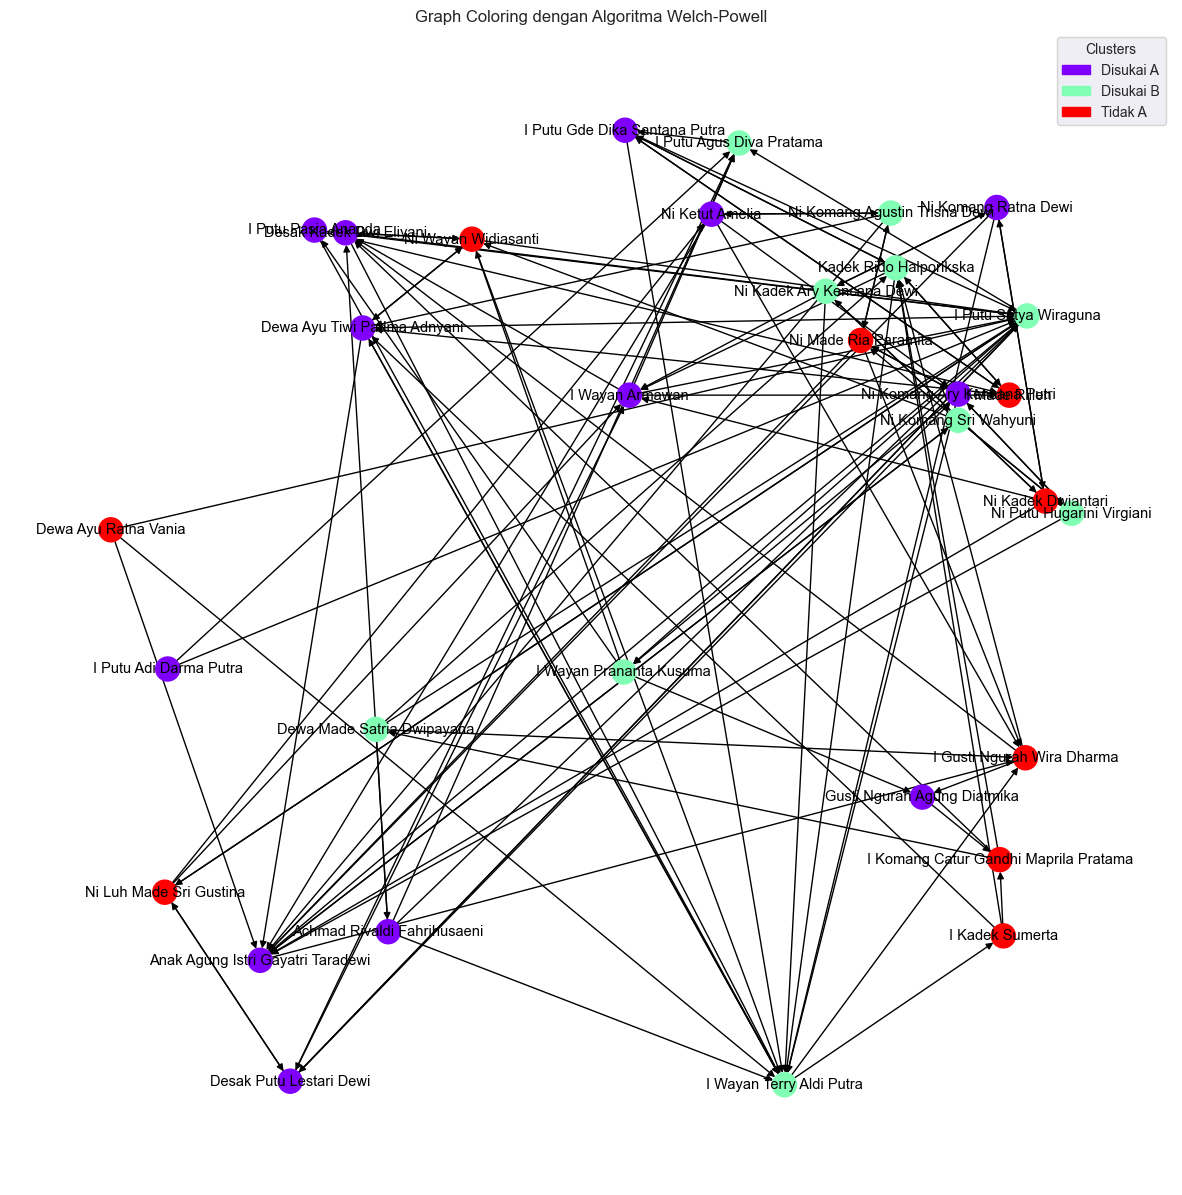

CPU times: user 12.4 s, sys: 734 ms, total: 13.2 s
Wall time: 44.6 s


In [54]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


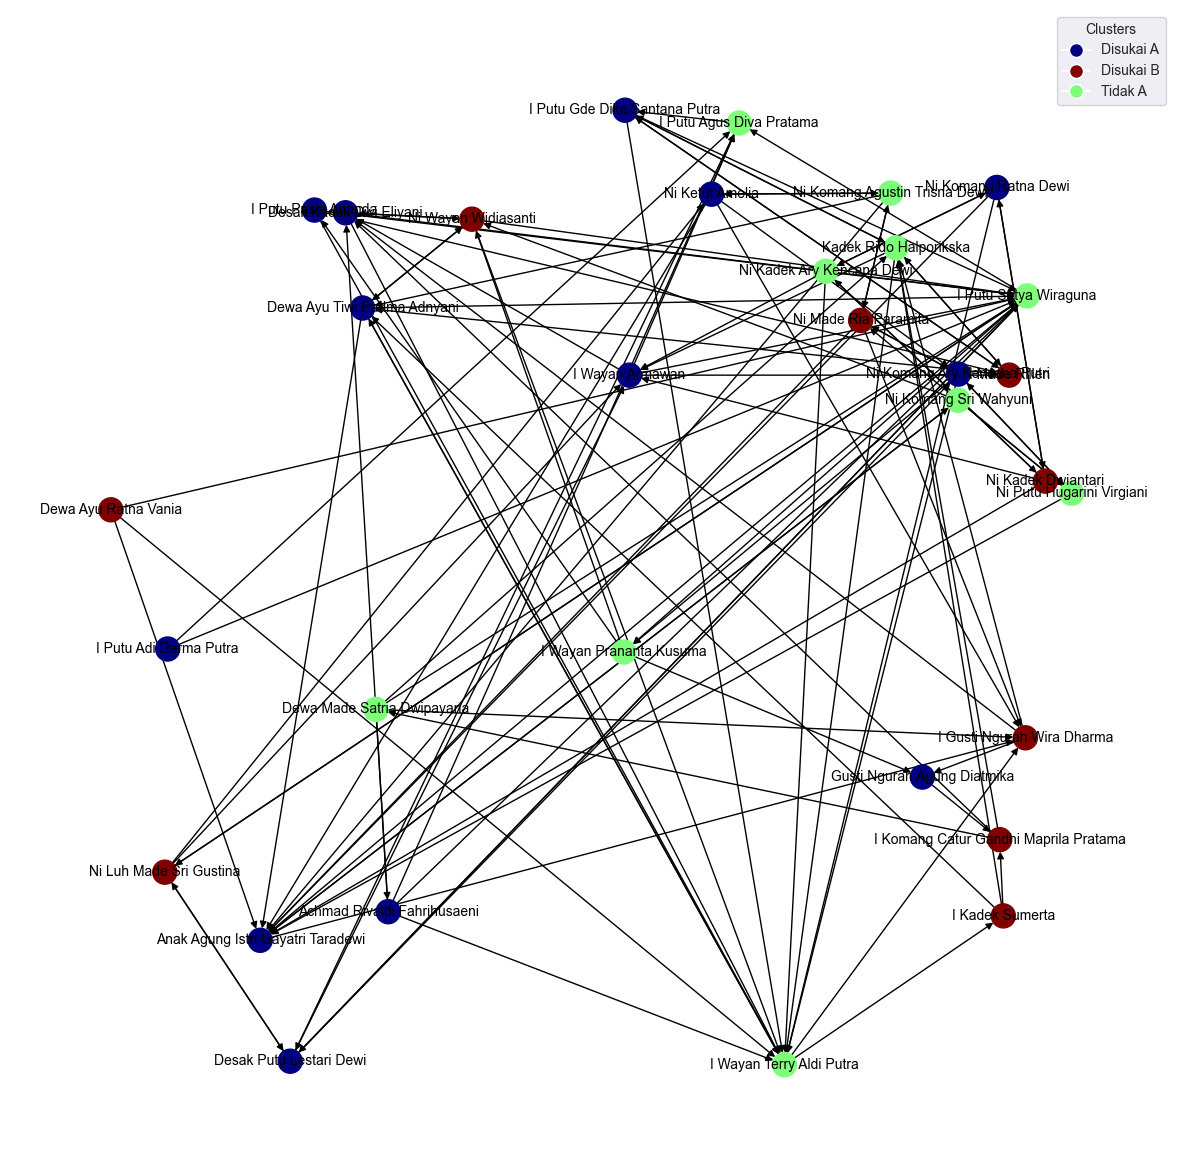

CPU times: user 9.32 s, sys: 703 ms, total: 10 s
Wall time: 15.1 s


In [55]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [58]:
file_path = "./sociometryclustering/Processed Data D.csv"
df = pd.read_csv(file_path)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,6/20/2023 11:20:19,nikomangsulastriasih@gmail.com,Achmad Rivaldi Fahrihusaeni,1,VIID,I Putu Agus Diva Pratama,baik,I Wayan Terry Aldi Putra,nyaman diajak ngobrol,I Putu Satya Wiraguna,suka mengejek,Desak Kadek Dwi Eliyani,suka cerewet gak jelas
1,5/16/2023 18:40:20,bawa.tara10@gmail.com,Anak Agung Istri Gayatri Taradewi,2,VIID,Ni Komang Sri Wahyuni,Karena dia baik dan bisa menjadi tempat yang b...,Ni Komang Sri Wahyuni,Baik,I Gusti Ngurah Wira Dharma,"Sering mengejek nama ortu, menjelekkan fisik sy",I Putu Satya Wiraguna,Sering mengejek nama ortu saat di tanya serius
2,6/20/2023 11:38:14,nikomangsulastriasih@gmail.com,Desak Kadek Dwi Eliyani,3,VIID,Dewa Ayu Tika Padma Ardina,karena dia baik,Ni Wayan Widiasanti,karena sering membuat saya tertawa,I Putu Satya Wiraguna,karena sering mengejek nama ortu saya,I Wayan Terry Aldi Putra,karena dia sering mengejek nama ortu saya
3,6/20/2023 11:08:28,nikomangsulastriasih@gmail.com,Desak Putu Lestari Dewi,4,VIID,Ni Luh Made Sri Gustina,karena teman dekat saya,Ni Komang Ary Kencana Putri,"dia ramah, pintar dan baik",I Putu Satya Wiraguna,"dia suka mengejek, menggangu dan gede rasa",I Wayan Armawan,dia suka mengejek dan mengganggu
4,5/17/2023 10:34:04,bawa.tara10@gmail.com,Dewa Ayu Ratna Vania,5,VIID,Anak Agung Istri Gayatri Taradewi,Iy karena dia baik,Anak Agung Istri Gayatri Taradewi,Iy karena di selalu kasih saya contekan,I Wayan Terry Aldi Putra,Karena dia sering membuat saya marah,I Putu Satya Wiraguna,Iy karena dia selalu ngejek mengejek nama oran...
5,5/17/2023 10:26:00,bawa.tara10@gmail.com,Dewa Ayu Tiwi Padma Adnyani,7,VIID,Anak Agung Istri Gayatri Taradewi,Iya karena dia sering memberi sy contekan,Ni Wayan Widiasanti,Karena dia bisa membuat sy ketawa,I Putu Satya Wiraguna,Karena dia membuat sy kesal,I Wayan Terry Aldi Putra,Karena dia sering membuat sy marah
6,5/6/2023 18:17:28,satriadwipayana3@gmail.com,Dewa Made Satria Dwipayana,8,VIID,Achmad Rivaldi Fahrihusaeni,Asik dan baik,Kadek Rido Halporikska,Baik,I Putu Satya Wiraguna,Baperan dan tidak boleh di ajak bercanda,I Gusti Ngurah Wira Dharma,SERING MENGEJEK NAMA ORANG TUA
7,5/21/2023 22:22:08,agusica420@gmail.com,Gusti Ngurah Agung Diatmika,9,VIID,I Komang Catur Gandhi Maprila Pratama,Karena baik,I Komang Catur Gandhi Maprila Pratama,Karena baik,Dewa Ayu Tika Padma Ardina,Berisik!!!,Dewa Ayu Tika Padma Ardina,Berisik!!
8,6/20/2023 11:17:57,nikomangsulastriasih@gmail.com,Gusti Ngurah Agung Diatmika,9,VIID,I Komang Catur Gandhi Maprila Pratama,karena baik,I Gusti Ngurah Wira Dharma,karena baik,Dewa Ayu Tiwi Padma Adnyani,berisik,Dewa Ayu Tika Padma Ardina,berisik
9,5/4/2023 18:09:40,weasepp06@gmail.com,I Gusti Ngurah Wira Dharma,10,VIID,Kadek Rido Halporikska,Asik,Gusti Ngurah Agung Diatmika,Baik,Dewa Ayu Tika Padma Ardina,Berisik,Desak Kadek Dwi Eliyani,Berisik


In [59]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

,Nama siswa/i yang disukai,Frekuensi disukai,Nama siswa/i yang tidak disukai,Frekuensi tidak disukai
0,Kadek Rido Halporikska,7.0,I Putu Satya Wiraguna,14.0
1,I Putu Agus Diva Pratama,5.0,Dewa Ayu Tika Padma Ardina,12.0
2,I Putu Gde Dika Santana Putra,5.0,I Wayan Terry Aldi Putra,10.0
3,I Made Rillen,5.0,Anak Agung Istri Gayatri Taradewi,7.0
4,Ni Komang Ary Kencana Putri,4.0,Dewa Ayu Tiwi Padma Adnyani,6.0
5,I Komang Catur Gandhi Maprila Pratama,4.0,I Wayan Armawan,5.0
6,Anak Agung Istri Gayatri Taradewi,3.0,I Gusti Ngurah Wira Dharma,4.0
7,Ni Wayan Widiasanti,3.0,Desak Kadek Dwi Eliyani,4.0
8,Ni Made Ria Paramita,3.0,Desak Putu Lestari Dewi,3.0
9,Ni Putu Hugarini Virgiani,2.0,Ni Luh Made Sri Gustina,1.0
